# Predict whether income exceeds $50K/yr based on census data.
   Also known as "Census Income" dataset.

## INTRODUCTION

                          The project aims to predict whether an individual's income exceeds $50,000 per year based on census data. This involves applying machine learning techniques to a dataset containing various demographic and socioeconomic features such as age, education, occupation, and marital status. 
                          By training a classifier on historical data where income levels are labeled, the model will learn patterns and correlations to make predictions on new data.

## Description:

                        In this notebook, we are going to Predict whether income exceeds $50K/yr based on census data by using various features like education, marital-status, occupation, sex, capital-gain, capital-loss etc

                     The dataset we are going to use is the Census income dataset from Kaggle which contains about 32561 rows and 15 columns features. 

                     The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

## Motivation:

                   The goal is to build an accurate predictive model that can assist in targeting resources or policy decisions related to socioeconomic disparities.
                      By accurately predicting whether an individual's income exceeds $50,000 per year, policymakers, researchers, and organizations can better allocate resources and develop targeted interventions to support individuals and communities in need. 
                      Moreover, such models can help in designing more effective public policies aimed at reducing poverty and promoting economic growth by identifying areas where support is most needed based on demographic and socioeconomic characteristics. Thus, this project serves as a tool for fostering equity and informed decision-making in socio-economic development efforts.

## Column Description

# Import libraries

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df= pd.read_csv(r"C:\Users\HP\Documents\cencus.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis

In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-los     32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Shape of the Data set

In [5]:
df.shape
#checking size (col,lin) of dataset
print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 32561
Number of Columns: 15


##### checking how many different values there are per column

In [6]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-los          92
hours-per-week       94
native-country       41
income                2
dtype: int64

##### Checking null values

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-los          0
hours-per-week       0
native-country     583
income               0
dtype: int64

## For replacing oject columns


##### For replacing Categorical columns
Taking mode of the column which has null value and replace with mode 

In [8]:
mode_value= df["workclass"].mode()[0]
df["workclass"].fillna(mode_value, inplace= True)

mode_value= df["occupation"].mode()[0]
df["occupation"].fillna(mode_value, inplace= True)

mode_value= df["native-country"].mode()[0]
df["native-country"].fillna(mode_value, inplace= True)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-los       0
hours-per-week    0
native-country    0
income            0
dtype: int64

# VISUALIZATION

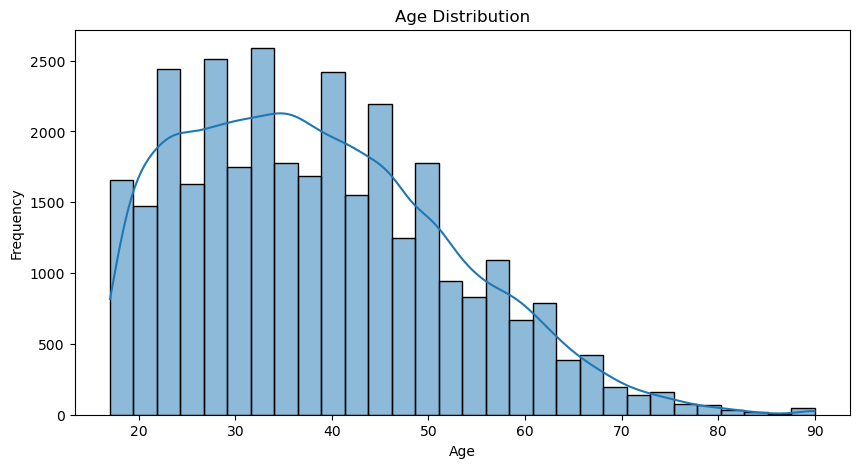

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

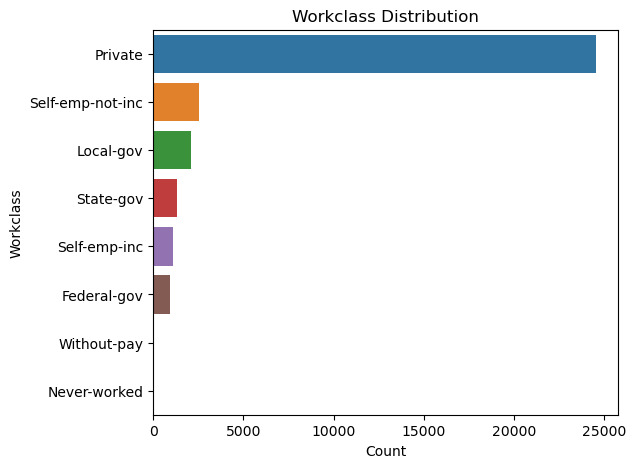

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

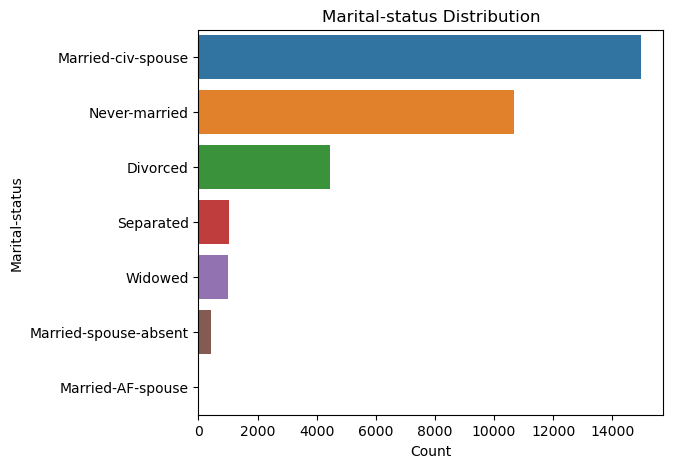

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(y='marital-status', data=df, order=df['marital-status'].value_counts().index)
plt.title('Marital-status Distribution')
plt.xlabel('Count')
plt.ylabel('Marital-status')
plt.show()

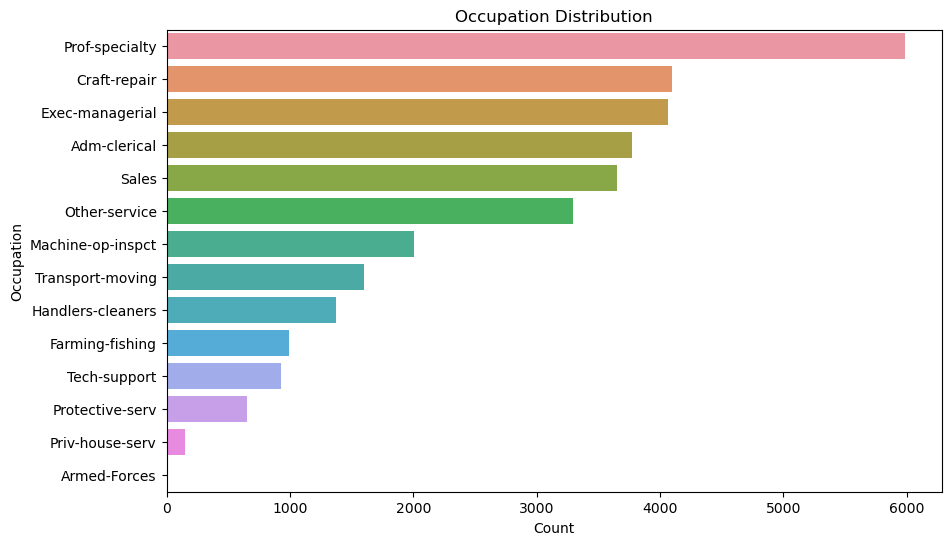

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

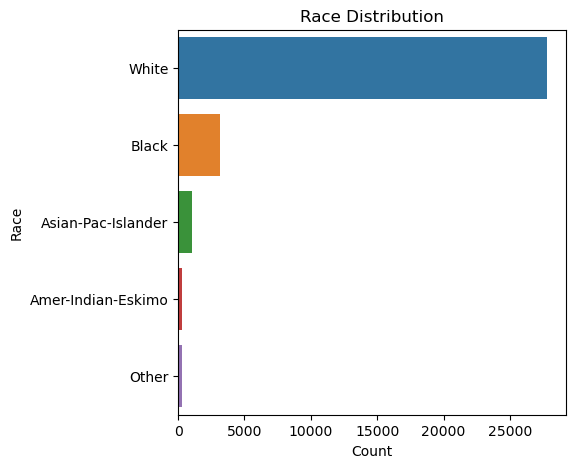

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(y='race', data=df, order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

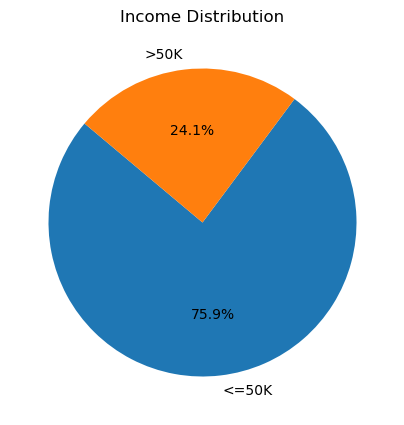

In [15]:
plt.figure(figsize=(5,5))
df['income'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

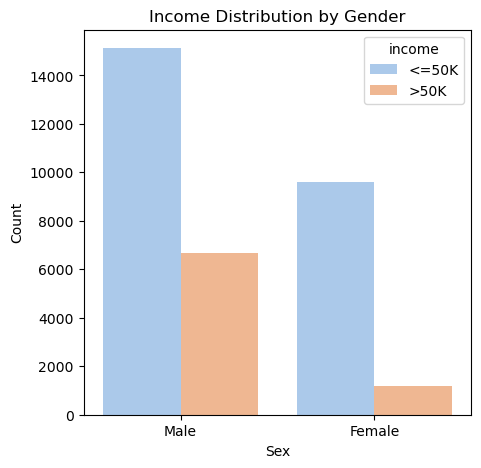

In [16]:
# Plotting the bar chart for income by sex
plt.figure(figsize=(5,5))
sns.countplot(x='sex', hue='income', data=df, palette='pastel')
plt.title('Income Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


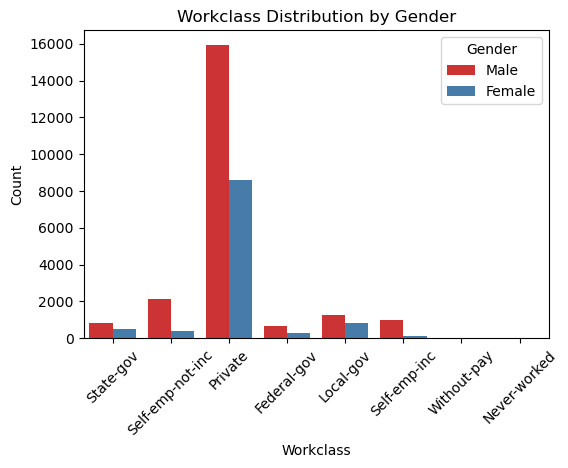

In [17]:


# Set up the figure size
plt.figure(figsize=(6,4))

# Plotting the grouped bar chart for workclass by gender
sns.countplot(x='workclass', hue='sex', data=df, palette='Set1')

# Adding labels and title
plt.title('Workclass Distribution by Gender')
plt.xlabel('Workclass')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()


# Drop unnecessary columns

In [18]:
df.drop('education-num', axis=1, inplace=True)
df.drop('relationship', axis=1, inplace=True)
df.drop('native-country', axis=1, inplace=True)


# Separting Numeric and category Data

In [19]:
df_num=df.select_dtypes(['int','float'])
df_num

,age,fnlwgt,capital-gain,capital-los,hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40
...,...,...,...,...,...
32556,27,257302,0,0,38
32557,40,154374,0,0,40
32558,58,151910,0,0,40
32559,22,201490,0,0,20


In [20]:
df_object=df.select_dtypes(['object'])
df_object


,workclass,education,marital-status,occupation,race,sex,income
0,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,<=50K
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,White,Female,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,White,Male,<=50K


# Using Label Encoder for converting category data into numeric

In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i]) 
#convert the cat to label encoder
df_object

,workclass,education,marital-status,occupation,race,sex,income
0,6,9,4,0,4,1,0
1,5,9,2,3,4,1,0
2,3,11,0,5,4,1,0
3,3,1,2,5,2,1,0
4,3,9,2,9,2,0,0
...,...,...,...,...,...,...,...
32556,3,7,2,12,4,0,0
32557,3,11,2,6,4,1,1
32558,3,11,6,0,4,0,0
32559,3,11,4,0,4,1,0


# Feacture scalling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
x_scaled=sc.fit_transform(df_num)
x_scaled


array([[ 0.03067056, -1.06361075,  0.1484529 , -0.21665953, -0.03542945],
       [ 0.83710898, -1.008707  , -0.14592048, -0.21665953, -2.22215312],
       [-0.04264203,  0.2450785 , -0.14592048, -0.21665953, -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.14592048, -0.21665953, -0.03542945],
       [-1.21564337,  0.11095988, -0.14592048, -0.21665953, -1.65522476],
       [ 0.98373415,  0.92989258,  1.88842434, -0.21665953, -0.03542945]])

In [25]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

            age    fnlwgt  capital-gain  capital-los  hours-per-week
0      0.030671 -1.063611      0.148453     -0.21666       -0.035429
1      0.837109 -1.008707     -0.145920     -0.21666       -2.222153
2     -0.042642  0.245079     -0.145920     -0.21666       -0.035429
3      1.057047  0.425801     -0.145920     -0.21666       -0.035429
4     -0.775768  1.408176     -0.145920     -0.21666       -0.035429
...         ...       ...           ...          ...             ...
32556 -0.849080  0.639741     -0.145920     -0.21666       -0.197409
32557  0.103983 -0.335433     -0.145920     -0.21666       -0.035429
32558  1.423610 -0.358777     -0.145920     -0.21666       -0.035429
32559 -1.215643  0.110960     -0.145920     -0.21666       -1.655225
32560  0.983734  0.929893      1.888424     -0.21666       -0.035429

[32561 rows x 5 columns]


# Concatenate Numerical and Categorical Columns

In [26]:
df_new=pd.concat([df_scaled,df_object],axis=1)
df_new

,age,fnlwgt,capital-gain,capital-los,hours-per-week,workclass,education,marital-status,occupation,race,sex,income
0,0.030671,-1.063611,0.148453,-0.21666,-0.035429,6,9,4,0,4,1,0
1,0.837109,-1.008707,-0.145920,-0.21666,-2.222153,5,9,2,3,4,1,0
2,-0.042642,0.245079,-0.145920,-0.21666,-0.035429,3,11,0,5,4,1,0
3,1.057047,0.425801,-0.145920,-0.21666,-0.035429,3,1,2,5,2,1,0
4,-0.775768,1.408176,-0.145920,-0.21666,-0.035429,3,9,2,9,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,-0.145920,-0.21666,-0.197409,3,7,2,12,4,0,0
32557,0.103983,-0.335433,-0.145920,-0.21666,-0.035429,3,11,2,6,4,1,1
32558,1.423610,-0.358777,-0.145920,-0.21666,-0.035429,3,11,6,0,4,0,0
32559,-1.215643,0.110960,-0.145920,-0.21666,-1.655225,3,11,4,0,4,1,0


# split the data

In [27]:
y=df_new.iloc[:,11:12]
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [28]:
x=df_new.drop('income',axis=1)
x

,age,fnlwgt,capital-gain,capital-los,hours-per-week,workclass,education,marital-status,occupation,race,sex
0,0.030671,-1.063611,0.148453,-0.21666,-0.035429,6,9,4,0,4,1
1,0.837109,-1.008707,-0.145920,-0.21666,-2.222153,5,9,2,3,4,1
2,-0.042642,0.245079,-0.145920,-0.21666,-0.035429,3,11,0,5,4,1
3,1.057047,0.425801,-0.145920,-0.21666,-0.035429,3,1,2,5,2,1
4,-0.775768,1.408176,-0.145920,-0.21666,-0.035429,3,9,2,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,-0.145920,-0.21666,-0.197409,3,7,2,12,4,0
32557,0.103983,-0.335433,-0.145920,-0.21666,-0.035429,3,11,2,6,4,1
32558,1.423610,-0.358777,-0.145920,-0.21666,-0.035429,3,11,6,0,4,0
32559,-1.215643,0.110960,-0.145920,-0.21666,-1.655225,3,11,4,0,4,1


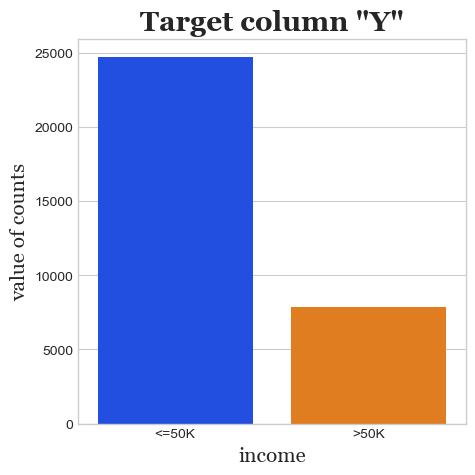

In [29]:
income = df['income'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5,5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Target column "Y"', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('income', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('value of counts', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [30]:
y.value_counts()

income
0         24720
1          7841
Name: count, dtype: int64

# Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling

In [31]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [32]:
x=x_ros
y=y_ros

In [33]:
y.value_counts()    

income
0         24720
1         24720
Name: count, dtype: int64

# Importing the models and Train them

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()
xgboost = XGBClassifier()
gbrt = GradientBoostingClassifier()

In [37]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [38]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      7391
           1       0.73      0.74      0.74      7441

    accuracy                           0.73     14832
   macro avg       0.73      0.73      0.73     14832
weighted avg       0.73      0.73      0.73     14832



LogisticRegression()

In [39]:
# accuracy score on the train data
y_pred = logreg.predict(x_train)
Train_Accuracy_logreg = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_logreg*100,2),"%")

Accuracy score of the training data :  73.09 %


In [40]:
# accuracy score on the test data
y_pred_on_test_data = logreg.predict(x_test)
Test_Accuracy_logreg = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_logreg*100,2),"%")

Accuracy score of the test data :  73.17 %


# GridSearchCV LogisticRegression

In [41]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Define the parameter grid
param_grid = {
    'C': [00.1, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],               # 'liblinear' for small datasets, 'saga' for larger
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2']                        # 'l1' lasso, 'l2' ridge
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy found: {grid_search.best_score_}")

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score_logreg1 = best_model.score(x_test, y_test)
print(f"Test set accuracy: {test_score_logreg1}")


Best parameters found: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy found: 0.7313337283473398
Test set accuracy: 0.731324163969795


# KNeighbors Classifier

In [42]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7391
           1       0.79      0.89      0.84      7441

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832



KNeighborsClassifier()

In [43]:
# accuracy score on the train data
y_pred = knn.predict(x_train)
Train_Accuracy_knn = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_knn*100,2),"%")

Accuracy score of the training data :  88.5 %


In [44]:
# accuracy score on the test data
y_pred_on_test_data = knn.predict(x_test)
Test_Accuracy_knn = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_knn*100,2),"%")

Accuracy score of the test data :  82.67 %


# GridSearchCV KNN

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate the model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)
test_accuracy_knn1 = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {test_accuracy_knn1}")


# Decision Tree Classifier

In [ ]:
mymodel(dt)

In [ ]:
# accuracy score on the train data
y_pred = dt.predict(x_train)
Train_Accuracy_dt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt*100,2),"%")

In [ ]:
# accuracy score on the test data
y_pred_on_test_data = dt.predict(x_test)
Test_Accuracy_dt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt*100,2),"%")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(x, y)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# You can then use the best parameters to fit your final model
best_model = grid_search.best_estimator_


In [ ]:
.

# Pruning techniques --> to solve the overfitting (hyper tunning)

## Max-Depth

In [ ]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=None)
    dt1.fit(x_train, y_train)
    ypred=dt1.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

In [ ]:
dt2=DecisionTreeClassifier(max_depth=None)
dt2.fit(x_train, y_train)
ypred=dt2.predict(x_test)

In [ ]:
dt2.score(x_train, y_train)

In [ ]:
dt2.score(x_test, y_test)

## Min_sample_split()

In [ ]:
for i in range(31,50):
    dt3=DecisionTreeClassifier(min_samples_split=2)
    dt3.fit(x_train, y_train)
    ypred=dt3.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

In [ ]:
dt4=DecisionTreeClassifier(min_samples_split=2)
dt4.fit(x_train, y_train)
ypred=dt4.predict(x_test)

In [ ]:
dt4.score(x_train, y_train)

In [ ]:
dt4.score(x_test, y_test)

## Min_sample_leaf

In [ ]:
for i in range(31,60):
    dt5=DecisionTreeClassifier(min_samples_leaf=1)
    dt5.fit(x_train, y_train)
    ypred=dt5.predict(x_test)

    ac=accuracy_score(y_test, ypred)
    print(f'{i} - {ac}')

In [ ]:
dt6=DecisionTreeClassifier(min_samples_leaf=1)
dt6.fit(x_train, y_train)
ypred=dt6.predict(x_test)

In [ ]:
dt6.score(x_train, y_train)

In [ ]:
dt6.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

In [ ]:
y_pred = dt6.predict(x_train)
Train_Accuracy_dt6 = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt6*100,2),"%")

In [ ]:
y_pred_on_test_data = dt6.predict(x_test)
Test_Accuracy_dt6 = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt6*100,2),"%")

# Random Forest Classifier

In [ ]:
mymodel(rf)

In [ ]:
# accuracy score on the train data
y_pred = rf.predict(x_train)
Train_Accuracy_rf = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_rf*100,2),"%")

In [ ]:
# accuracy score on the test data
y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_rf = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_rf*100,2),"%")

# XGB Classifier

In [ ]:
mymodel(xgboost)

In [ ]:
# accuracy score on the train data
y_pred = xgboost.predict(x_train)
Train_Accuracy_xgboost = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_xgboost*100,2),"%")

In [ ]:
# accuracy score on the test data
y_pred_on_test_data = xgboost.predict(x_test)
Test_Accuracy_xgboost = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_xgboost*100,2),"%")

# Gradient Boosting Classifier

In [ ]:
mymodel(gbrt)

In [ ]:
# accuracy score on the train data
y_pred = gbrt.predict(x_train)
Train_Accuracy_gbrt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_gbrt*100,2),"%")

In [ ]:
# accuracy score on the test data
y_pred_on_test_data = gbrt.predict(x_test)
Test_Accuracy_gbrt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_gbrt*100,2),"%")

# SVM

In [ ]:
mymodel(svm)

In [ ]:
# accuracy score on the train data
y_pred = svm.predict(x_train)
Train_Accuracy_svm = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_svm*100,2),"%")

In [ ]:
# accuracy score on the test data
y_pred_on_test_data = svm.predict(x_test)
Test_Accuracy_svm = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_svm*100,2),"%")

## Comparison of models

In [ ]:
ML_Model=['Linear Regression','Decision Tree','Random Forest','Gradient boost','XG boost','k-Nearest Neighbors Regression']

Train_Accuracy=[Train_Accuracy_logreg,Train_Accuracy_dt6,Train_Accuracy_rf,Train_Accuracy_xgboost,Train_Accuracy_gbrt,Train_Accuracy_knn]
Train_ACC = [round(i,3) for i in Train_Accuracy]

Test_Accuracy=[Test_Accuracy_logreg,Test_Accuracy_dt6,Test_Accuracy_rf,Test_Accuracy_xgboost,Test_Accuracy_gbrt,Test_Accuracy_knn]
Test_ACC = [round(i,3) for i in Test_Accuracy]


In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': Train_ACC,
    'Test Accuracy': Test_ACC},index=[1,2,3,4,5,6])

In [ ]:
results

In [ ]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [Test_Accuracy_logreg,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_xgboost,Test_Accuracy_gbrt,Test_Accuracy_knn],
    "ML Models": ['Linear Regression','Decision Tree','Random Forest','Gradient boost','XG boost','k-Nearest Neighbors Regression']
})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# Conclusion